# Investigating spike sorting results

Have your spike sorters finished? We are going to compare the results from the various sorters following the "spikeinterface" paper (https://elifesciences.org/articles/61834). Very helpfully, they have provided code that reproduces their Figure 1: https://spikeinterface.github.io/blog/ensemble-sorting-of-a-neuropixels-recording.

In this notebook, I will show you how to load the data from multiple sorter runs. After that, I invite you to copy the code from the "spikeinterface" paper into this notebook, and apply their techniques to our data.

## Prerequisites

First, the usual prerequisites:

In [1]:
!pip install spikeinterface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 747.9/747.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 11.0 MB/s eta 0:00:00


In [2]:
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw
from probeinterface import Probe
from probeinterface.plotting import plot_probe

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib_venn import venn3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root = "/content/drive/MyDrive/datasai-daw/data/2021-07-20_11-59-01"
src = Path(root) / "Record Node 115"

## Loading spike sorting results

Here is how to load spike sorting results I obtained earlier by passing the entire 1-hour-long recording into various sorters:

In [5]:
sorting_hs = ss.read_sorter_folder(src / 'res_slp_hs') # HerdingSpikes2
sorting_ms = ss.read_sorter_folder(src / 'res_slp_ms') # MountingSort5
sorting_tri = ss.read_sorter_folder(src / 'res_slp_tri') # Tridesclous
sorting_sc = ss.read_sorter_folder(src / 'res_slp_sc2') # SpykingCircus2
sorting_ksall = se.KiloSortSortingExtractor(src / 'experiment1/recording9/continuous/Neuropix-PXI-111.0/kilosort20_output') # Kilosort2
sorting_ks = se.KiloSortSortingExtractor(src / 'experiment1/recording9/continuous/Neuropix-PXI-111.0/kilosort20_output', keep_good_only=True) # Kilosort2


(The difference between `ks_all` and `ks` is the inclusion in the former of units that Kilosort itself expresses doubt about.)

In [6]:
allsorts = {
    "HS": sorting_hs,
    "MS": sorting_ms,
    "TRI": sorting_tri,
    "SC": sorting_sc,
    "KS0": sorting_ksall,
    "KS": sorting_ks
}

I encourage you to load your own data (and those of your colleagues) instead of mine.

## Quick look at spike sorting results

Before we compare the various results, let's take a quick look at one sorter. For instance, herding spikes:

Unit 0 - num spikes: 29191
Unit 1 - num spikes: 26195
Unit 2 - num spikes: 13900
Unit 3 - num spikes: 12310
Unit 4 - num spikes: 15431
Unit 5 - num spikes: 10871
Unit 6 - num spikes: 10851
Unit 7 - num spikes: 11381
Unit 8 - num spikes: 10687
Unit 9 - num spikes: 11673
Unit 10 - num spikes: 10041
Unit 11 - num spikes: 10774
Unit 12 - num spikes: 10205
Unit 13 - num spikes: 7633
Unit 14 - num spikes: 4753
Unit 15 - num spikes: 4048
Unit 16 - num spikes: 6684
Unit 17 - num spikes: 4954
Unit 18 - num spikes: 5643
Unit 19 - num spikes: 4919
Unit 20 - num spikes: 8453
Unit 21 - num spikes: 3311
Unit 22 - num spikes: 4622
Unit 23 - num spikes: 3850
Unit 24 - num spikes: 4614
Unit 25 - num spikes: 2003
Unit 26 - num spikes: 3571
Unit 27 - num spikes: 3691
Unit 28 - num spikes: 3353
Unit 29 - num spikes: 3307
Unit 30 - num spikes: 2209
Unit 31 - num spikes: 2526
Unit 32 - num spikes: 3956
Unit 33 - num spikes: 2350
Unit 34 - num spikes: 3075
Unit 35 - num spikes: 2496
Unit 36 - num spikes: 208

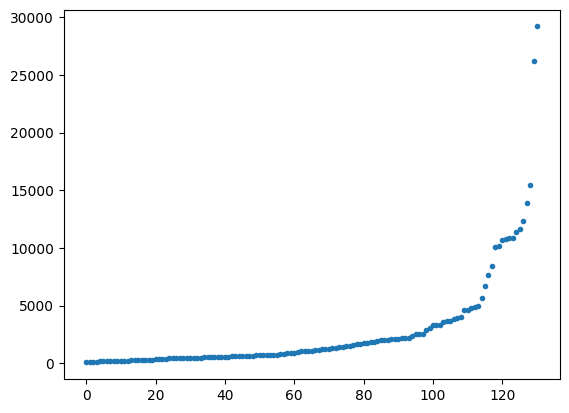

In [7]:
nspk = []
for unit in sorting_hs.get_unit_ids():
    spiketrain = sorting_hs.get_unit_spike_train(unit)
    nspk.append(len(spiketrain))
    print(f"Unit {unit} - num spikes: {len(spiketrain)}")
print("Total number of units:", len(sorting_hs.get_unit_ids()))
nspk.sort()
plt.plot(nspk, '.')

## Comparing spike sorting results

Now, look at the https://spikeinterface.github.io/blog/ensemble-sorting-of-a-neuropixels-recording notebook, and apply their analysis to our data.

In [8]:
# Insert your code here


A useful tutorial notebook that teaches much more about spikeinterface is here: https://github.com/SpikeInterface/spiketutorials/blob/master/Official_Tutorial_SI_0.96_Oct22/SpikeInterface_Tutorial.ipynb.